<a href="https://colab.research.google.com/github/Ashraf-Saleheen/Data-Science-Projects1/blob/main/Outlier%26AnamolyDetectionCrimeProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###Loading Dataset

In [ ]:
df = pd.read_csv('/content/crime.csv')
df.head(10)

,Arrest Year,Arrest Date,Arrest Hour,Age,Defendant Race,Defendant Ethnicity,Defendant Sex,Arrest Category,Offense Latitude,Offense Longitude
0,2021,1/1/21,0,38,BLACK,UNKNOWN,MALE,Damage to Property,38.927,-77.006
1,2021,1/1/21,0,31,BLACK,NOT HISPANIC,MALE,Simple Assault,38.925,-77.033
2,2021,1/1/21,0,35,BLACK,NOT HISPANIC,MALE,Weapon Violations,38.900,-76.930
3,2021,1/1/21,0,31,BLACK,NOT HISPANIC,MALE,Weapon Violations,38.849,-76.976
4,2021,1/1/21,0,21,BLACK,NOT HISPANIC,MALE,Weapon Violations,38.882,-76.925
5,2021,1/1/21,1,19,BLACK,NOT HISPANIC,MALE,Weapon Violations,38.922,-77.027
6,2021,1/1/21,1,63,BLACK,NOT HISPANIC,MALE,Simple Assault,38.883,-76.939
7,2021,1/1/21,1,28,BLACK,NOT HISPANIC,MALE,Narcotics,38.857,-76.974
8,2021,1/1/21,1,19,WHITE,HISPANIC,MALE,Damage to Property,38.945,-77.027
9,2021,1/1/21,1,20,BLACK,NOT HISPANIC,FEMALE,Simple Assault,38.925,-76.961


In [ ]:
df.shape

(15653, 10)

In [ ]:
df.columns

Index(['Arrest Year', 'Arrest Date', 'Arrest Hour', 'Age', 'Defendant Race',
       'Defendant Ethnicity', 'Defendant Sex', 'Arrest Category',
       'Offense Latitude', 'Offense Longitude'],
      dtype='object')

####Checking for missing values

In [ ]:
df.isnull()

,Arrest Year,Arrest Date,Arrest Hour,Age,Defendant Race,Defendant Ethnicity,Defendant Sex,Arrest Category,Offense Latitude,Offense Longitude
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15648,False,False,False,False,False,False,False,False,False,False
15649,False,False,False,False,False,False,False,False,False,False
15650,False,False,False,False,False,False,False,False,False,False
15651,False,False,False,False,False,False,False,False,False,False


In [ ]:
features = ['Arrest Year', 'Arrest Date', 'Arrest Hour', 'Age', 'Defendant Race',
       'Defendant Ethnicity', 'Defendant Sex', 'Arrest Category',
       'Offense Latitude', 'Offense Longitude']

In [ ]:
# for feature in features:
#   null_check = pd.isnull(df[features])
#   print(null_check)

In [ ]:
df = df.dropna()
df.shape

(15632, 10)

##Arrest Pattern of Crime

####Categorical Classification

In [ ]:
df['Defendant Race'].unique()

array(['BLACK', 'WHITE', 'UNKNOWN', 'ASIAN', 'MULTIPLE', 'OTHER'],
      dtype=object)

In [ ]:
df['Arrest Category'].unique()

array(['Damage to Property', 'Simple Assault', 'Weapon Violations',
       'Narcotics', 'Other Crimes', 'Driving/Boating While Intoxicated',
       'Traffic Violations', 'Sex Offenses', 'Theft', 'Property Crimes',
       'Release Violations/Fugitive (Warr)',
       'Release Violations/Fugitive (Fug)',
       'Offenses Against Family & Children', 'Liquor Law Violations',
       'Assault with a Dangerous Weapon', 'Homicide',
       'Assault on a Police Officer', 'Burglary', 'Vending Violations',
       'Robbery', 'Motor Vehicle Theft', 'Sex Abuse',
       'Aggravated Assault', 'Disorderly Conduct', 'Gambling',
       'Kidnapping', 'Fraud and Financial Crimes',
       'Fraud and Financial Crimes (Frau)', 'Theft from Auto',
       'Prostitution', 'Fraud and Financial Crimes (Forg)',
       'Fraud and Financial Crimes (Coun)'], dtype=object)

In [ ]:
df_sex = df.groupby('Defendant Sex').size().reset_index(name='Numbers')

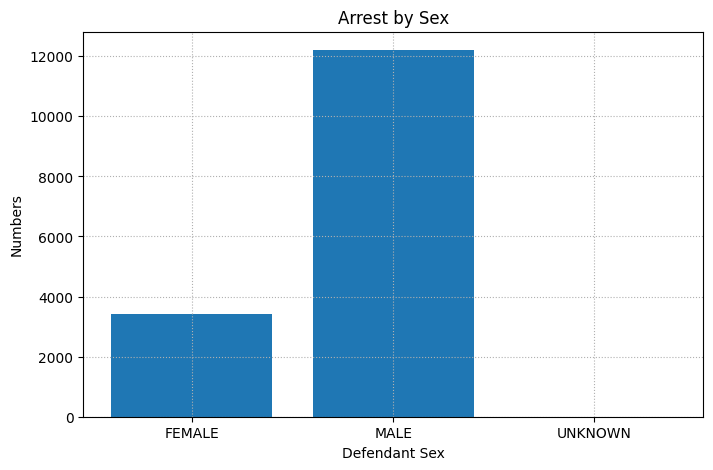

In [ ]:
plt.figure(figsize=(8,5))
plt.xlabel('Defendant Sex')
plt.ylabel('Numbers')
x = df_sex['Defendant Sex']
y = df_sex['Numbers']
plt.title("Arrest by Sex")
plt.bar(x,y)
plt.grid(which='both', linestyle =':')


###Data Classification continues

In [ ]:
df_age = df.groupby('Age').size().reset_index(name='Numbers')
df_age

,Age,Numbers
0,18,275
1,19,311
2,20,390
3,21,483
4,22,447
...,...,...
64,83,1
65,85,1
66,88,1
67,120,4


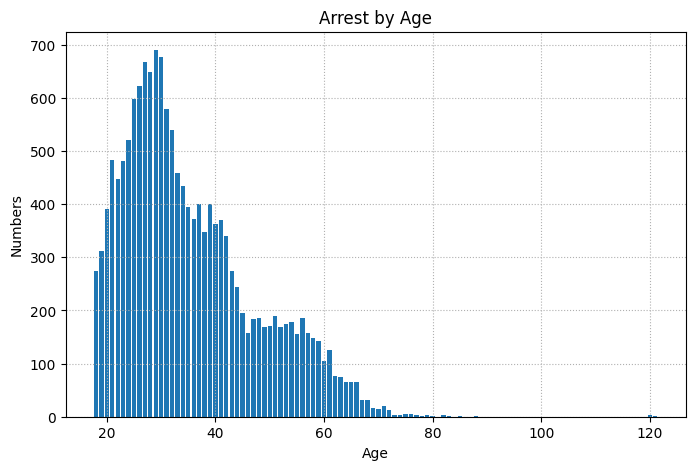

In [ ]:
plt.figure(figsize=(8,5))
plt.xlabel('Age')
plt.ylabel('Numbers')
x = df_age['Age']
y = df_age['Numbers']
plt.title("Arrest by Age")
plt.bar(x,y)
plt.grid(which='both', linestyle =':')

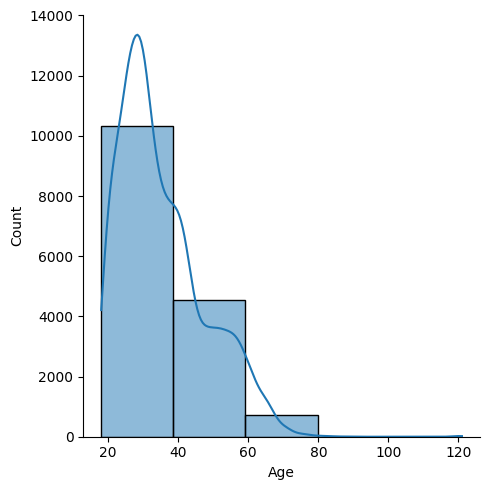

In [ ]:
sns.displot(df['Age'], kde=True, bins=5)

In [ ]:
df['Age'].min()

18

In [ ]:
df['Age'].max()

121

###Detect Anamolies in the Dataset Using Boxplot or Whisker

<Axes: >

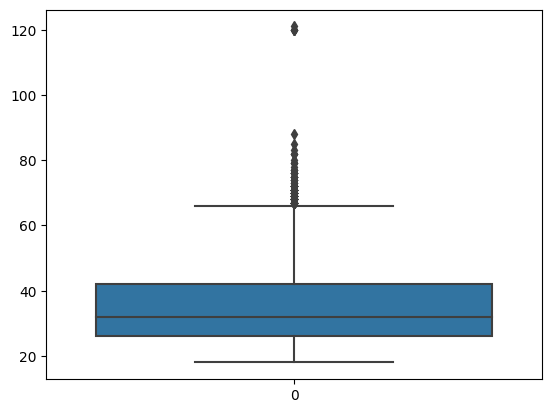

In [ ]:
sns.boxplot(df['Age'])

#### Caculate the upper and lower limits

In [ ]:
q_1 = df['Age'].quantile(0.25)
q_3 = df['Age'].quantile(0.75)
iqr = q_3 - q_1
iqr
lower = q_1 - 1.5 * iqr
upper = q_3 + 1.5 * iqr


#### Create a boolean value to show outliers

In [ ]:
upper_array = np.where(df['Age'] >= upper)[0]
lower_array = np.where(df['Age'] <= lower)[0]

####Eliminate Outliers

In [ ]:
df.drop(index = upper_array, inplace=True)
df.drop(index = lower_array, inplace=True)

<ipython-input-39-3a6154564de7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index = upper_array, inplace=True)
<ipython-input-39-3a6154564de7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index = lower_array, inplace=True)


In [ ]:
df.shape

(15401, 10)